<h1 style="font-size:3rem;color:orange;">AvaFin 2. Task for Data Analyst position</h1>

# Data preparation

## Loading packages

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data from finava_data.csv file

In [135]:
df = pd.read_csv("/Users/macbookair/Desktop/finava_data.csv", delimiter=';')

## Getting domain names from emails, and removing the field

In [136]:
df['domain'] = df['email'].str.split('@').str[1]
df.drop('email', axis=1, inplace=True)

## Changing registration pages loading time from milseconds to minutes, and removing the fields

In [137]:
df['registration_duration_1_min'] = df['registration_duration_page_1'] / 1000 / 60
df['registration_duration_2_min'] = df['registration_duration_page_2'] / 1000 / 60
df['registration_duration_3_min'] = df['registration_duration_page_3'] / 1000 / 60
df['avg_min_registration_duration'] = df[['registration_duration_1_min', 'registration_duration_2_min','registration_duration_3_min']].mean(axis=1)
registratinList = ['registration_duration_page_1','registration_duration_page_2','registration_duration_page_3','registration_duration_1_min','registration_duration_2_min','registration_duration_3_min']
df.drop(registratinList, axis=1, inplace=True)

## Creating device type column from longitude and latitude - as said, could be incorrect in some cases, and removing the fields

In [138]:
df['device'] = np.where(df['longitude'].notna() & df['latitude'].notna(), 'mobile', 'other')
deviceList = ['longitude','latitude']
df.drop(deviceList, axis=1, inplace=True)

## Count warnings raised from external partners for each loan, and removing the fields

In [139]:
warningList = ['warning_A','warning_B','warning_C','warning_D']
df['warnings'] = df[warningList].sum(axis=1)
df.drop(warningList, axis=1, inplace=True)

## Create client income minus expenses as client profit

In [140]:
df['client_profit'] = df['income'] - df['expenses']

# Data analysis

As discussed, for data analysis, my perspetive will be to have general differences between defaulted and repaid loans
with focus on defaulted loans, as those, in general, are the loans with issues for the FinAva Company. 

## Warning count differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

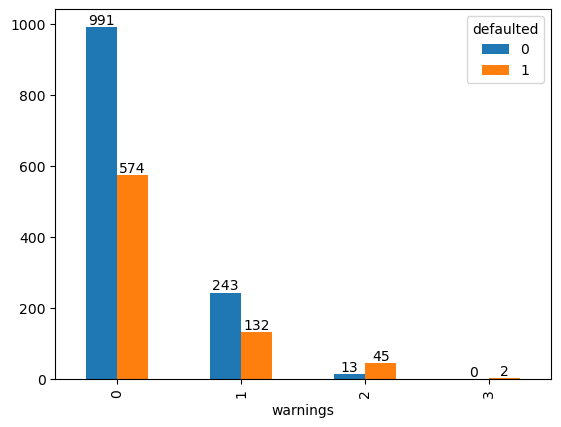

In [141]:
plt.figure()
wbar = pd.crosstab(df['warnings'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> As we can see, defaulted loans with two warning are slighly more than repaid, and three warnings are
    only for defaulted loans. There could be some correlation between number of warnings, and defaulted loans
</div>

## Device type differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

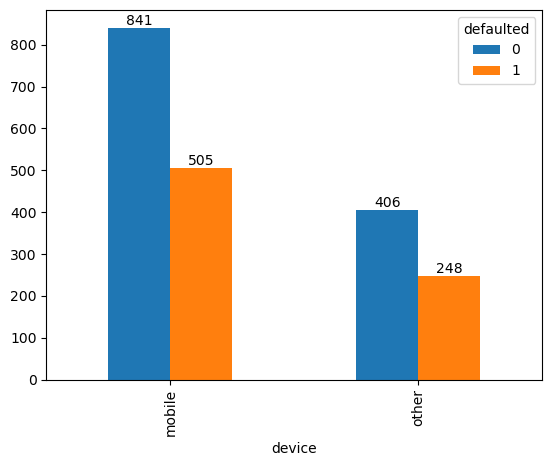

In [142]:
plt.figure()
wbar = pd.crosstab(df['device'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

## Domain Name differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

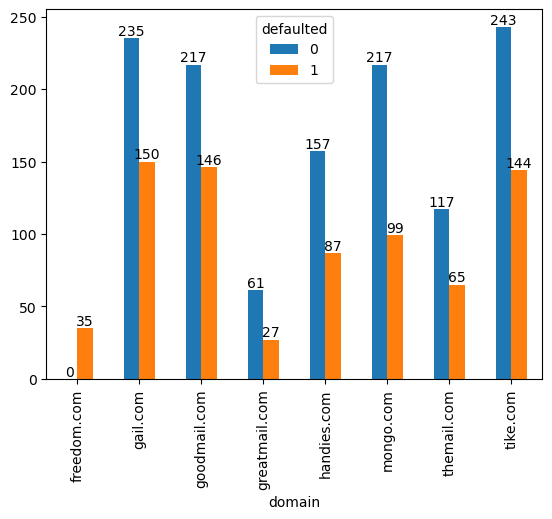

In [143]:
plt.figure()
wbar = pd.crosstab(df['domain'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Iteresting fact, that all freedom.com emails are defaulted
</div>

## Bank ID differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

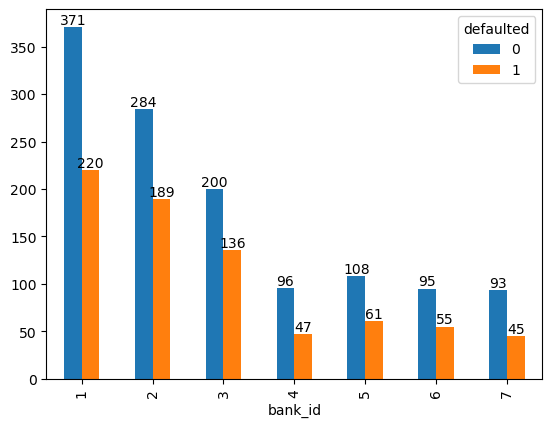

In [144]:
plt.figure()
wbar = pd.crosstab(df['bank_id'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

## Gender differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

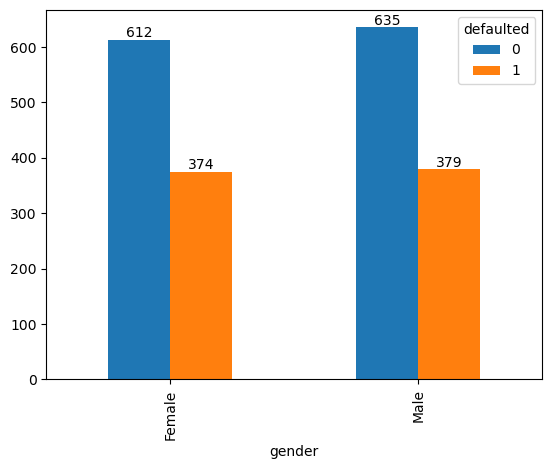

In [145]:
plt.figure()
wbar = pd.crosstab(df['gender'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

## Loan Term differences for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

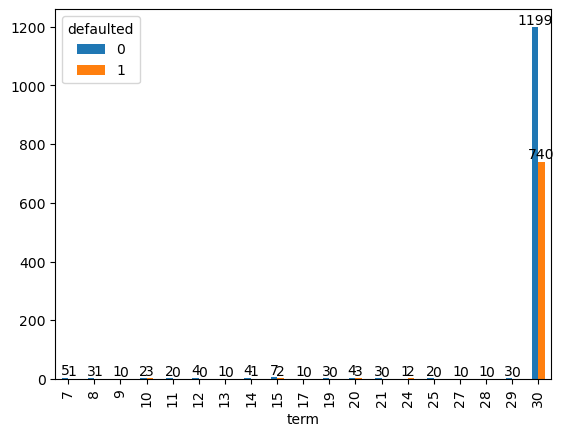

In [146]:
plt.figure()
wbar = pd.crosstab(df['term'],df['defaulted']).plot.bar()
for c in wbar.containers:
    wbar.bar_label(c)
plt.show()

## Application Weekdays for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

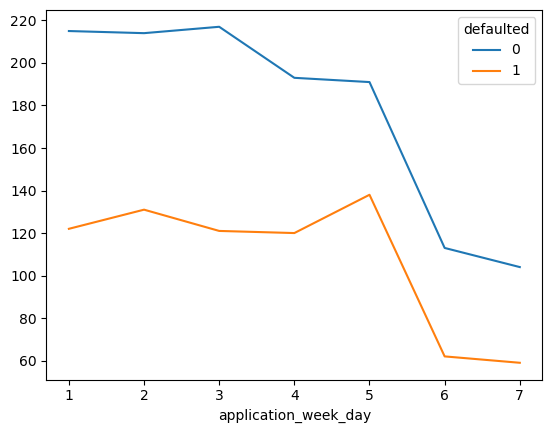

In [147]:
plt.figure()
wbar = pd.crosstab(df['application_week_day'],df['defaulted']).plot.line()
plt.show()

## Application Hours for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

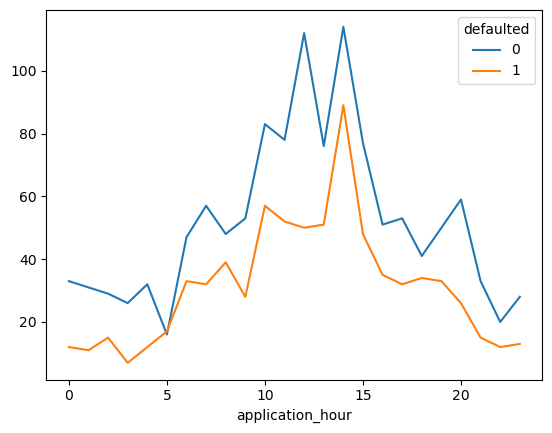

In [148]:
plt.figure()
wbar = pd.crosstab(df['application_hour'],df['defaulted']).plot.line()
plt.show()

## Registration page loading in minutes duration histograms for defaulted loans

<Figure size 640x480 with 0 Axes>

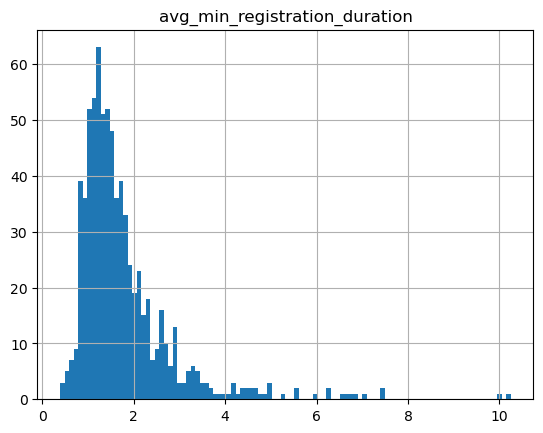

In [149]:
plt.figure()

df_defaulted = df[df['defaulted'] == 1]
whist = df_defaulted.hist(column='avg_min_registration_duration', bins=100)

plt.show()

## Registration page loading in minutes duration histograms for repaid loans

<Figure size 640x480 with 0 Axes>

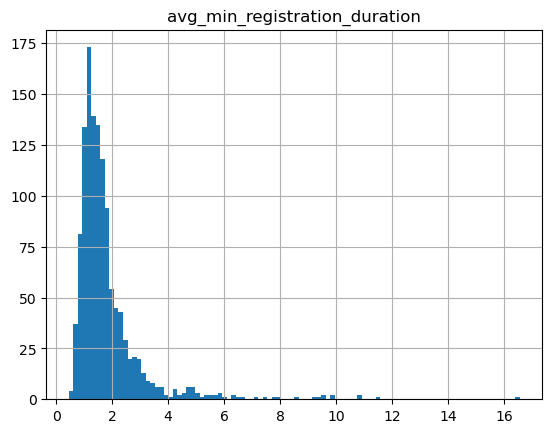

In [150]:
plt.figure()

df_repaid = df[df['defaulted'] == 0]
whist = df_repaid.hist(column='avg_min_registration_duration', bins=100)

plt.show()

## Loan Amount histogram for defaulted loans

<Figure size 640x480 with 0 Axes>

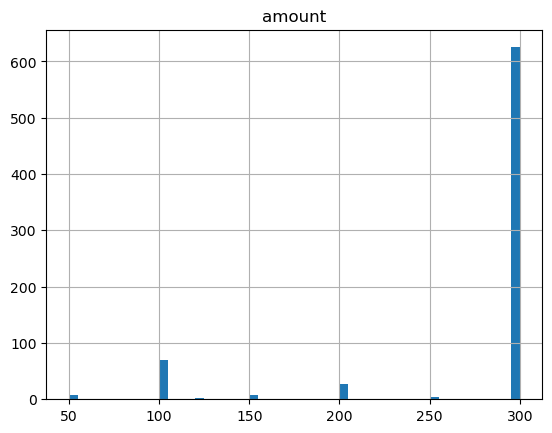

In [151]:
plt.figure()

whist = df_defaulted.hist(column='amount', bins=50)

plt.show()

## Loan Amount histogram for repaid loans

<Figure size 640x480 with 0 Axes>

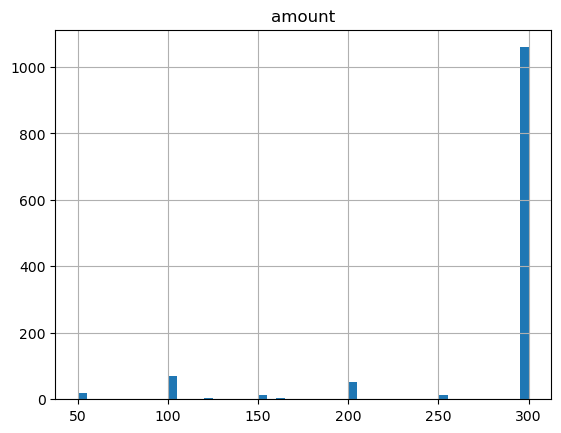

In [164]:
plt.figure()

whist = df_repaid.hist(column='amount', bins=50)

plt.show()

## Client profit(Income and Expenses factor) box plot for defaulted and repaid loans

<Figure size 640x480 with 0 Axes>

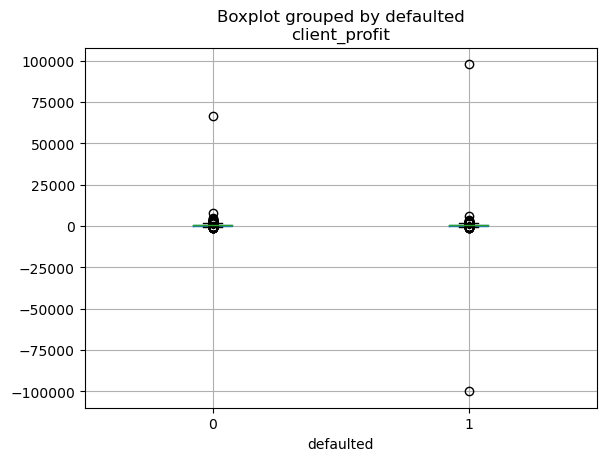

In [160]:
plt.figure()

df.boxplot(column=['client_profit'], by='defaulted')

plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> In this chart, we can see, that there is one loan, which stoods out from defaulted loans, where its
    income - expenses is less than 100K. There shouldnt be such deviation when the loan is approved for the client. 
</div>